In [1]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import statsmodels.api as stats
import sklearn as sklearn
from sklearn import preprocessing
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [2]:
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", mat.__version__)
print("statsmodels version:", stats.__version__)
print("sklearn version:", sklearn.__version__)

pandas version: 1.0.5
numpy version: 1.18.5
matplotlib version: 3.3.0
statsmodels version: 0.11.1
sklearn version: 0.23.1


In [3]:
dataframe = pd.read_csv('linear.csv')
print("Shape of the dataset: {}".format(dataframe.shape))
print("------------------------------")
print(dataframe.describe())
print("------------------------------")

Shape of the dataset: (300, 2)
------------------------------
                x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837
------------------------------


In [4]:
X_featured = dataframe["x"]
Y_observed = dataframe["y"]

def standardize_data(data):
    return (data - np.mean(data)) / (np.std(data))
## END

def normalize_data(data):
    return (data - np.mean(data)) / (np.max(data) - np.min(data))
## END

X_rescaled = standardize_data(X_featured)
print(X_rescaled.describe())

# Don't forget - adding ones to the x matrix
feature_matrix = np.c_[np.ones((len(X_rescaled),1)), X_rescaled]

count    3.000000e+02
mean    -2.368476e-17
std      1.001671e+00
min     -1.789969e+00
25%     -8.411599e-01
50%      7.250772e-02
75%      7.753289e-01
max      1.724138e+00
Name: x, dtype: float64


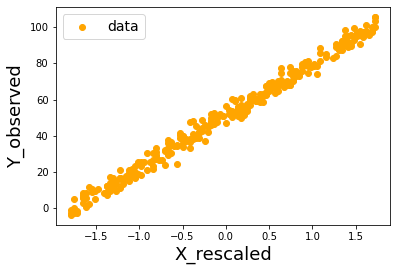

In [5]:
plt.scatter(X_rescaled, Y_observed, color = "orange", label = 'data')
plt.xlabel('X_rescaled', fontsize = 18)
plt.ylabel('Y_observed', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

In [6]:
# create the model
linear_regression = LinearRegression()

# fit the model
linear_regression.fit(feature_matrix, Y_observed)

intercept = linear_regression.intercept_
coef = linear_regression.coef_[1]
print("Intercept: {}".format(intercept))
print("Coefficient for feature_matirx: {}".format(coef))

Intercept: 51.20505109827666
Coefficient for feature_matirx: 28.864676358853227


In [7]:
Y_predicted = intercept*feature_matrix[:,0] + coef*feature_matrix[:,1]

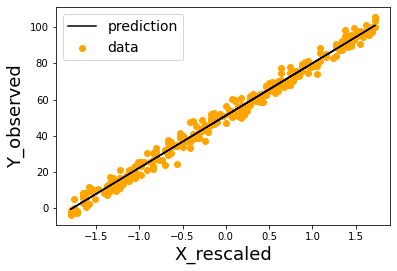

In [8]:
plt.scatter(X_rescaled, Y_observed, color = "orange", label = 'data')
plt.plot(X_rescaled, Y_predicted, color = "black", label = 'prediction')
plt.xlabel('X_rescaled', fontsize = 18)
plt.ylabel('Y_observed', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()